In [29]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
from matplotlib import cm
import matplotlib.animation as animation

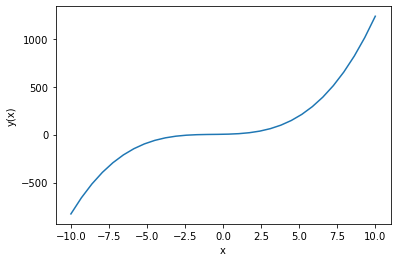

(30, 30)

In [2]:
#  绘制多项式函数
func = np.poly1d(np.array([1, 2, 3, 4]).astype(float))
x = np.linspace(-10, 10, 30)
y = func(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()
len(x), len(y)

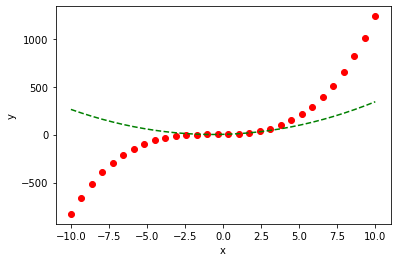

In [3]:
# 绘制导数
func1 = func.deriv(m=1)
x = np.linspace(-10, 10, 30) 
y = func(x) 
y1 = func1(x)
plt.plot(x, y, 'ro', x, y1, 'g--') 
plt.xlabel('x') 
plt.ylabel('y') 
plt.show()

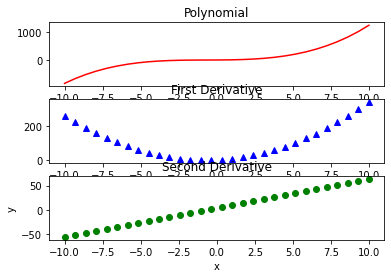

In [4]:
# func = np.poly1d(np.array([1, 2, 3, 4]).astype(float)) 
x = np.linspace(-10, 10, 30) 
y = func(x) 
func1 = func.deriv(m=1) 
y1 = func1(x) 
func2 = func.deriv(m=2) 
y2 = func2(x)

# 子图将被组织成3行1列
plt.subplot(311) 
plt.plot(x, y, 'r-') 
plt.title("Polynomial")

plt.subplot(312) 
plt.plot(x, y1, 'b^') 
plt.title("First Derivative")

plt.subplot(313) 
plt.plot(x, y2, 'go')
plt.title("Second Derivative") 
plt.xlabel('x') 
plt.ylabel('y') 
plt.show()

In [5]:
from matplotlib.dates import DateFormatter 
from matplotlib.dates import DayLocator 
from matplotlib.dates import MonthLocator 
import mplfinance
import sys 
from datetime import date 
import matplotlib.pyplot as plt 

today = date.today() 
start = (today.year - 1, today.month, today.day) 

alldays = DayLocator() 
months = MonthLocator() 
month_formatter = DateFormatter("%b %Y") 

symbol = 'DISH' 

if len(sys.argv) == 2: 
    symbol = sys.argv[1] 
    
quotes = mplfinance.quotes_historical_yahoo_ochl(symbol, start, today) 

fig = plt.figure() 
ax = fig.add_subplot(111) 
ax.xaxis.set_major_locator(months) 
ax.xaxis.set_minor_locator(alldays) 
ax.xaxis.set_major_formatter(month_formatter) 

mplfinance.plot(ax, quotes) 
fig.autofmt_xdate() 
plt.show()

AttributeError: module 'mplfinance' has no attribute 'quotes_historical_yahoo_ochl'

(array([3., 2., 1., 2., 1., 0., 0., 0., 0., 1.]),
 array([ 2. ,  6.3, 10.6, 14.9, 19.2, 23.5, 27.8, 32.1, 36.4, 40.7, 45. ]),
 <BarContainer object of 10 artists>)

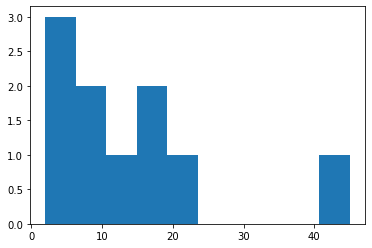

In [6]:
# 直方图
# hist该函数的参数中有这样两项——包含数据的数组以及柱形的数量
x = np.random.randn(10) + 1
y = np.array([2, 4, 6, 7, 10, 14, 17, 19, 20, 45])
plt.hist(y, 10)

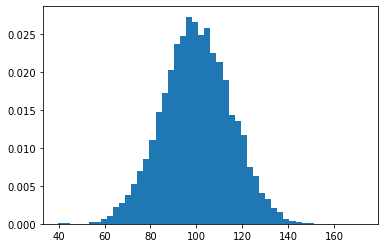

In [7]:
mu = 100
sigma = 15
x = mu + sigma*np.random.randn(10000)
plt.hist(x, 50, stacked=True, density=True)
plt.show()

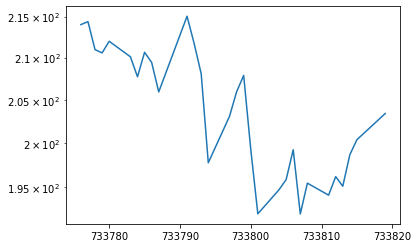

In [8]:
# 对数坐标图
def datestr2num(s): 
    return datetime.datetime.strptime (s.decode('ascii'), "%Y-%m-%d").toordinal() 
dates,closes, volumns=np.loadtxt('apple.csv', delimiter=',', 
                        usecols=(0,4, 5), converters={0:datestr2num}, unpack=True, skiprows=1)
dates = dates[:30]
closes = closes[:30]
volumns = volumns[:30]
plt.semilogy(dates, closes)

#Matplotlib中有semilogx函数（对x轴取对数）、
#semilogy函数（对y轴取对数）和loglog函数（同时对x轴和y轴取对数）。

F:\Anaconda3\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


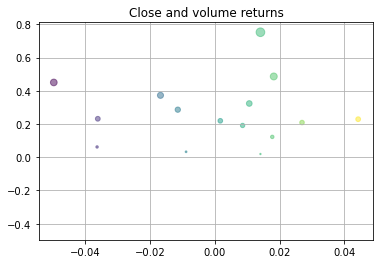

In [9]:
# 散点图
ret = np.diff(closes)/closes[:-1]
volchange = np.diff(volumns)/volumns[:-1]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(ret, volchange, c=ret * 100, s=volchange * 100, alpha=0.5)
# 设置图像的标题并添加网格线
ax.set_title('Close and volume returns') 
ax.grid(True)
plt.show()

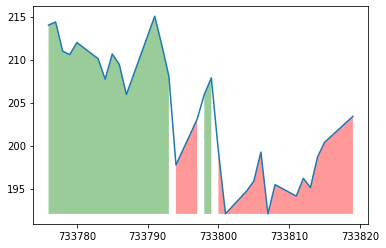

In [10]:
# 着色
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(dates, closes)
plt.fill_between(dates, closes.min(), closes, 
 where=closes>closes.mean(), facecolor="green", alpha=0.4) 
plt.fill_between(dates, closes.min(), closes, 
 where=closes<closes.mean(), facecolor="red", alpha=0.4)

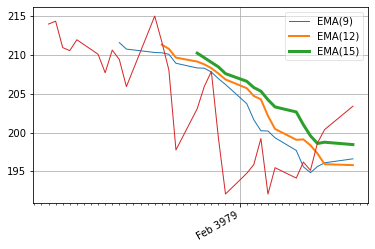

In [21]:
# 使用图例和注释
# 分别使用9、12和15作为周期数计算和绘制指数移动平均线。
fig = plt.figure() 
ax = fig.add_subplot(111)
emas = [] 
for i in range(9, 18, 3): 
    weights = np.exp(np.linspace(-1., 0., i)) 
    weights /= weights.sum() 
    
    ema = np.convolve(weights, closes)[i-1:-i+1] 
    idx = (i - 6)/3 
    ax.plot(dates[i-1:], ema, lw=idx, label="EMA(%s)" % (i)) 
    data = np.column_stack((dates[i-1:], ema)) 
    emas.append(np.rec.fromrecords( data, names=["dates", "ema"]))
# 调用plot函数时需要指定图例的标签。我们将指数移动平均线的值存在数组中

# 来找到两条指数移动平均曲线的交点
first = emas[0]["ema"].flatten() 
second = emas[1]["ema"].flatten() 
bools = np.abs(first[-len(second):] - second)/second < 0.0001 
xpoints = np.compress(bools, emas[1])

# 将找到的交点用注释和箭头标注出来，并确保注释文本在交点的不远处
for xpoint in xpoints: 
    ax.annotate('x', xy=xpoint, textcoords='offset points', 
    xytext=(-50, 30), 
    arrowprops=dict(arrowstyle="->"))
    
# ) 添加一个图例并由Matplotlib自动确定其摆放位置。
leg = ax.legend(loc='best', fancybox=True)

# 设置alpha通道值，将图例透明化。
leg.get_frame().set_alpha(0.5)

alldays = DayLocator() 
months = MonthLocator() 
month_formatter = DateFormatter("%b %Y") 
ax.plot(dates, closes, lw=1.0, label="Close") 
ax.xaxis.set_major_locator(months) 
ax.xaxis.set_minor_locator(alldays) 
ax.xaxis.set_major_formatter(month_formatter) 
ax.grid(True) 
fig.autofmt_xdate() 
plt.show()

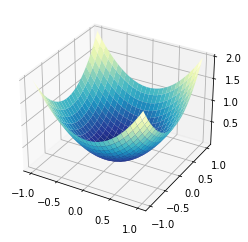

In [27]:
# 三维绘图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# 将使用meshgrid函数创建一个二维的坐标网格
u = np.linspace(-1, 1, 100) 
x, y = np.meshgrid(u, u)
z = x ** 2 + y ** 2
ax.plot_surface(x, y, z, rstride=4, cstride=4, cmap=cm.YlGnBu_r)
plt.show()

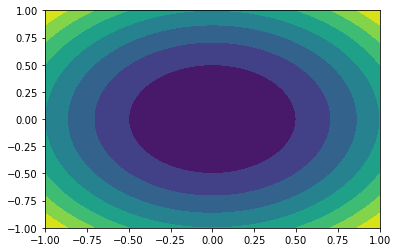

In [28]:
# 绘制色彩填充的等高线图
fig = plt.figure() 
ax = fig.add_subplot(111) 
u = np.linspace(-1, 1, 100) 
x, y = np.meshgrid(u, u) 
z = x ** 2 + y ** 2 
ax.contourf(x, y, z) 
plt.show()

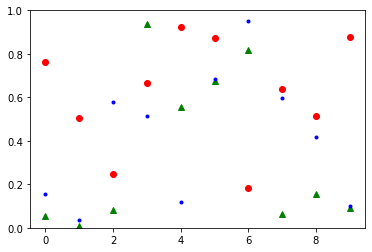

In [33]:
# 制作动画


# 下面的函数将被定期调用以更新屏幕上的内容
def update(data): 
    circles.set_ydata(data[0]) 
    triangles.set_ydata(data[1]) 
    return circles, triangles

# 生成随机数
def generate(): 
    while True: yield np.random.rand(2, N)
        
fig = plt.figure() 
ax = fig.add_subplot(111) 
N = 10 
x = np.random.rand(N) 
y = np.random.rand(N) 
z = np.random.rand(N)
# 将用不同颜色的圆形、小圆点和三角形来绘制三个数据集中的数据点
circles, triangles, dots = ax.plot(x, 'ro', y, 'g^', z, 'b.')

ax.set_ylim(0, 1)
# plt.axis('off')
anim = animation.FuncAnimation(fig, update, generate, interval=150) 
plt.show()